In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [8]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [11]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# summarize number of classes
print("Classes: ")
print(numpy.unique(y))

# summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


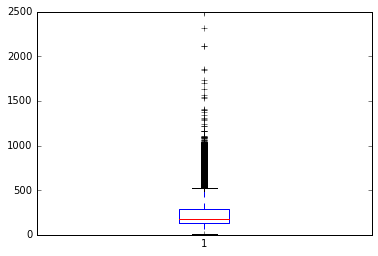

In [12]:
# summarize review length
print("Review length: ")
result = map(len, X)
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

# plot review length
pyplot.boxplot(result)
pyplot.show()

In [13]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [14]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

In [15]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [16]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 16000)         0           embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 250)           4000250     flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             251         dense_1[0][0]                    
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_______________

In [17]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)

# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 20s - loss: 0.5098 - acc: 0.7143 - val_loss: 0.3166 - val_acc: 0.8636
Epoch 2/2
25000/25000 [==============================] - 20s - loss: 0.2005 - acc: 0.9237 - val_loss: 0.3049 - val_acc: 0.8734
Accuracy: 87.34%


In [18]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [19]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [20]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_2 (Embedding)          (None, 500, 32)       160000      embedding_input_2[0][0]          
____________________________________________________________________________________________________
convolution1d_1 (Convolution1D)  (None, 500, 32)       3104        embedding_2[0][0]                
____________________________________________________________________________________________________
maxpooling1d_1 (MaxPooling1D)    (None, 250, 32)       0           convolution1d_1[0][0]            
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 8000)          0           maxpooling1d_1[0][0]             
___________________________________________________________________________________________

In [21]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)

# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 23s - loss: 0.4222 - acc: 0.7794 - val_loss: 0.2899 - val_acc: 0.8776
Epoch 2/2
25000/25000 [==============================] - 22s - loss: 0.2202 - acc: 0.9140 - val_loss: 0.2845 - val_acc: 0.8821
Accuracy: 88.21%
